In [5]:
import zipfile
import urllib.request
import pandas as pd

# Step 1: Download the dataset from the URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"
urllib.request.urlretrieve(url, "smsspamcollection.zip")

# Step 2: Unzip the file
with zipfile.ZipFile("smsspamcollection.zip", 'r') as zip_ref:
    zip_ref.extractall("smsspamcollection")

# Step 3: Load the SMS Spam Collection dataset (SMSSpamCollection file)
# The dataset is inside the 'smsspamcollection' folder, and we need to load the 'SMSSpamCollection' file
df = pd.read_csv("smsspamcollection/SMSSpamCollection", sep='\t', names=['label', 'message'])

# Step 4: Display the first few rows of the dataframe to check the content
print(df.head())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.9719
Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1448
        spam       0.97      0.81      0.89       224

    accuracy                           0.97      1672
   macro avg       0.97      0.90      0.93      1672
weighted avg       0.97      0.97      0.97      1672

Confusion Matrix:
[[1443    5]
 [  42  182]]


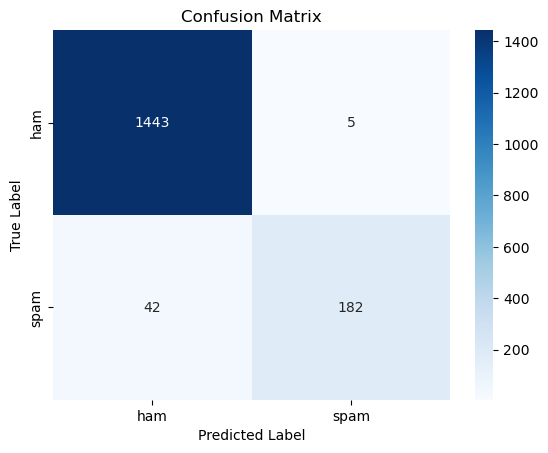

Message: Free money! Call now to claim your prize.
Predicted Label: spam

Message: Hey, are we still meeting at the cafe later?
Predicted Label: ham



In [7]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK resources
nltk.download('stopwords')

# Step 1: Download and unzip the dataset (already done above)
# Step 2: Load the dataset
df = pd.read_csv("smsspamcollection/SMSSpamCollection", sep='\t', names=['label', 'message'])

# Step 3: Data Preprocessing
# Clean text: remove non-alphabetic characters and convert to lowercase
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\S+', '', text)  # Remove mentions
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    return text

# Apply text cleaning
df['cleaned_message'] = df['message'].apply(clean_text)

# Step 4: Tokenization and Stopword Removal
stop_words = set(stopwords.words('english'))

# Tokenize the text and remove stopwords
def tokenize_and_remove_stopwords(text):
    tokens = text.split()
    return ' '.join([word for word in tokens if word not in stop_words])

df['processed_message'] = df['cleaned_message'].apply(tokenize_and_remove_stopwords)

# Step 5: Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(df['processed_message'])

# Step 6: Train-Test Split
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 7: Model Training (Naive Bayes)
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 8: Model Evaluation
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Visualize Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Step 9: Testing the Model with New Data
new_messages = [
    "Free money! Call now to claim your prize.",
    "Hey, are we still meeting at the cafe later?"
]

# Preprocess and predict spam/ham for new messages
new_messages_cleaned = [clean_text(msg) for msg in new_messages]
new_messages_processed = [tokenize_and_remove_stopwords(msg) for msg in new_messages_cleaned]
new_messages_vectorized = vectorizer.transform(new_messages_processed)

# Predict spam/ham for new messages
predicted_labels = model.predict(new_messages_vectorized)

# Output predictions
for msg, label in zip(new_messages, predicted_labels):
    print(f"Message: {msg}")
    print(f"Predicted Label: {label}\n")
